<a href="https://colab.research.google.com/github/kunal266/Algo_Practice/blob/main/Arma_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh



--2022-02-08 06:02:23--  https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/archive/Anaconda3-5.1.0-Linux-x86_64.sh [following]
--2022-02-08 06:02:23--  https://repo.anaconda.com/archive/Anaconda3-5.1.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 577996269 (551M) [application/x-sh]
Saving to: ‘Anaconda3-5.1.0-Linux-x86_64.sh’

Anaconda3-5.1.0-Lin 100%[===================>] 551.22M   138MB/s    in 4.9s    

2022-02-08 06:02:29 (113 MB/s) - ‘Anaconda3-5.1.0-Linux-x86_64.sh’ sa

In [ ]:
!chmod +x Anaconda3-5.1.0-Linux-x86_64.sh

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults

In [4]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [5]:
pip install pmdarima

In [6]:
pip show pmdarima

Name: pmdarima
Version: 1.8.4
Summary: Python's forecast::auto.arima equivalent
Home-page: http://alkaline-ml.com/pmdarima
Author: None
Author-email: None
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: pandas, scipy, numpy, setuptools, joblib, scikit-learn, Cython, statsmodels, urllib3
Required-by: 


In [7]:


from pmdarima import auto_arima

In [8]:

df1 = pd.read_csv('/content/drive/MyDrive/UDEMY_TSA_FINAL/Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'
df1= df1[:120]

In [9]:
df2 = pd.read_csv('/content/drive/MyDrive/UDEMY_TSA_FINAL/Data/TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq='MS'

## ARMA

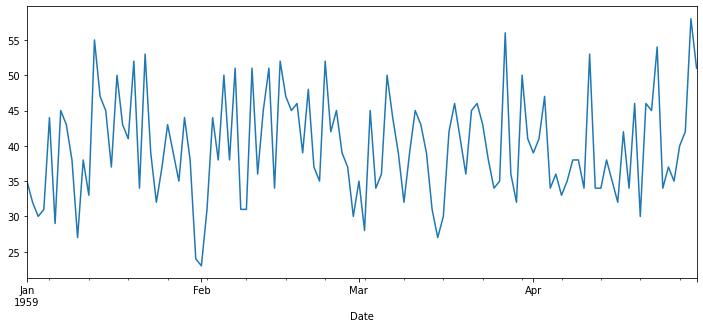

In [10]:
df1['Births'].plot(figsize=(12,5))

In [11]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [12]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [13]:
auto_arima(df1['Births'],seasonal=False,trace=True,).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1230.607, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=896.926, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1121.103, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.54 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.65 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=824.647, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=823.489, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=824.747, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=826.399, Time=0.95 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 3.541 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Tue, 08 Feb 2022   AIC                            823.489
Time:                        05:57:13   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.36   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
pip show pmdarima

Name: pmdarima
Version: 1.8.4
Summary: Python's forecast::auto.arima equivalent
Home-page: http://alkaline-ml.com/pmdarima
Author: None
Author-email: None
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: urllib3, joblib, numpy, Cython, scikit-learn, scipy, setuptools, pandas, statsmodels
Required-by: 


In [15]:
train = df1.iloc[:90]
test = df1.iloc[90:]


In [21]:
from statsmodels.tsa.arima_process import ArmaProcess


In [26]:
model = ArmaProcess(train['Births'],ma=(2,2)).generate_sample(nsample=10000)

In [28]:
import matplotlib.pyplot as plt

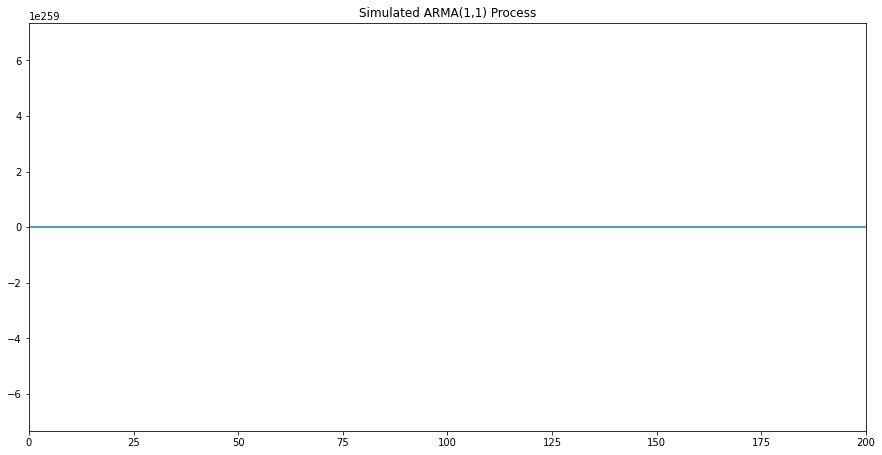

In [29]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(model)
plt.title("Simulated ARMA(1,1) Process")
plt.xlim([0, 200])
plt.show()

In [33]:
model

array([ 3.98756659e-002, -5.57809942e-002,  3.36804224e-002, ...,
       -5.94081093e+259,  6.67830640e+259, -6.65763504e+259])

In [39]:
from  statsmodels.tsa.statespace.sarimax import SARIMAX

In [72]:
model = ARIMA(train['Births'],order=(2,0,2))

In [73]:
results = model.fit()

In [74]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -307.812
Date:                Tue, 08 Feb 2022   AIC                            627.625
Time:                        06:47:55   BIC                            642.624
Sample:                    01-01-1959   HQIC                           633.673
                         - 03-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7573      1.017     39.088      0.000      37.764      41.751
ar.L1         -0.4663      1.004     -0.465      0.642      -2.434       1.501
ar.L2          0.5078      0.941      0.540      0.589      -1.336       2.351
ma.L1          0.5624     17.671      0.032      0.975     -34.072      35.197
ma.L2         -0.4375      7.621     -0.057      0.954     -15.375      14.500
sigma2        54.3797    944.429      0.058      0.954   -1796.666    1905.426
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.00
Prob(Q):                              0.96   Prob(JB):                         0.37
Heteroskedasticity (H):               0.92   Skew:                             0.16
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
start= len(train)
end = len(train)+ len(test)-1

In [76]:
predictions = results.predict(start,end).rename('ARMA (2,0,2) Predictions')

In [77]:
test

,Births
Date,
1959-04-01,39
1959-04-02,41
1959-04-03,47
1959-04-04,34
1959-04-05,36
1959-04-06,33
1959-04-07,35
1959-04-08,38
1959-04-09,38


In [78]:
predictions

1959-04-01    40.534165
1959-04-02    39.550158
1959-04-03    40.248388
1959-04-04    39.423147
1959-04-05    40.162490
1959-04-06    39.398701
1959-04-07    40.130268
1959-04-08    39.401311
1959-04-09    40.112689
1959-04-10    39.410833
1959-04-11    40.099323
1959-04-12    39.421900
1959-04-13    40.087375
1959-04-14    39.433091
1959-04-15    40.076090
1959-04-16    39.444036
1959-04-17    40.065256
1959-04-18    39.454645
1959-04-19    40.054808
1959-04-20    39.464904
1959-04-21    40.044719
1959-04-22    39.474817
1959-04-23    40.034974
1959-04-24    39.484395
1959-04-25    40.025559
1959-04-26    39.493649
1959-04-27    40.016464
1959-04-28    39.502589
1959-04-29    40.007677
1959-04-30    39.511225
Freq: D, Name: ARMA (2,0,2) Predictions, dtype: float64

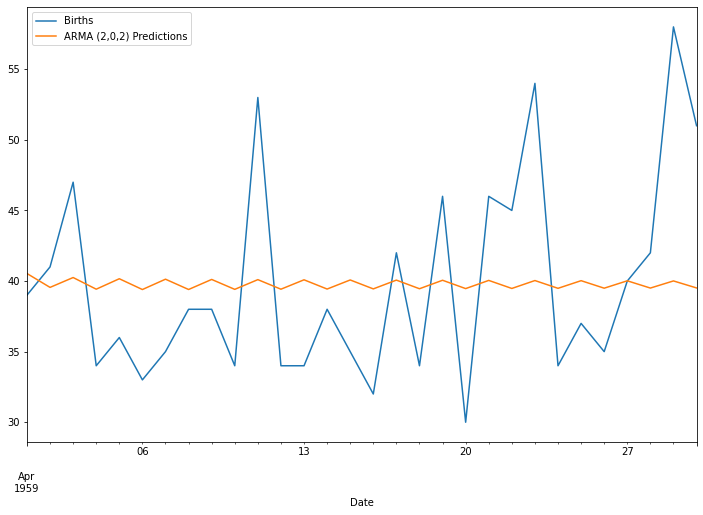

In [79]:
test['Births'].plot(figsize=(12,8),legend=True)
predictions.plot(figsize=(12,8),legend=True)

In [80]:
test.mean()

Births    39.833333
dtype: float64

In [81]:
predictions.mean()

39.78565491129514